# Introduction to Naive Bayes Models

### Data Science 410

This notebook introduces you to naive Bayes models. Naive Bayes models are a surprisingly useful and effective simplification of the general Bayesian models. Naive Bayes models make the naive assumption of independence of the features.

Some properties of naive Bayes models are:

- Do not require a prior.
- Computational complexity is linear in number of parameter/features.
- Requires minimal data to produce models that generalizes well.
- Have a simple and inherent regularization.

Naive Bayes models are widely used including for:

- Document classification,
- SPAM detection,
- Image classification,
- As a basis for more sophisticated models.

## Overview of Naive Bayes Models

Recall Bayes theorem:

$$P(A|B) = P(B|A) \frac{P(A)}{P(B)}$$

Using the chain rule of conditional probabilities, we can create write the joint distribution for the probability of class $C_k$ as: 

$$
p(C_k, x_1, x_2, x_3, \ldots, x_n) = p(x_1, x_2, x_3, \ldots, x_n, C_k) \\
=  p(x_1 | x_2, x_3, \ldots, x_n, C_k)  p(x_2, x_3, \ldots, x_n, C_k) \\
= p(x_1 | x_2, x_3, \ldots, x_n, C_k)  p(x_2 | x_3, \ldots, x_n, C_k) p(x_3, \ldots, x_n, C_k) \\
\cdots \cdots \\\
=  p(x_1 | x_2, x_3, \ldots, x_n, C_k)  p(x_2 | x_3, \ldots, x_n, C_k) \dots p(C_k)
$$

Let the features, $\{ x_1, x_2, x_3, \ldots, x_n \}$, be independent, the above can then be written as:

$$p(x_i | x_{i + 1}, x_{i + 2}, \ldots, x_n, C_k) = p(x_i | C_k)$$

This simpification allows us to write the probability of the class $C_k$ as the conditional distribution:

$$p(C_k | x_1, x_2, x_3, \ldots, x_n) \propto p(C_k) \prod^N_{j = 1} p(x_j|C_k)$$

Given a number of classes, we can find the mostly likely class $\hat{y}$ as:

$$\hat{y} = argmax_k \Big[p(C_k) \prod^N_{j = 1} p(x_j|C_k) \Big]$$

Notice that the above formulation uses only the emperical probabilities of the features conditioned on the class. Futher no prior distirbution is required. 


### Pitfalls in naive Bayes models

There are some well know pitfalls with known solutions, including:

- Multiplication of small probabilities leads to floating point underflow. This problem is corrected by computing with the **log probabilities, $ln(p)$**. The maximumization problem then becomes:   

$$\hat{y} = argmax_k \Big[ log \big(p(C_k) \big) + \sum^N_{j = 1} log \big (p(x_j|C_k) \big) \Big]$$

- If there are no samples/data then $p(x_j|C_k) = 0$, leading the product of probabilities to be 0. A **Laplace smoother** is used to ensure that all $p(x_.j|C_k) > 0$
- Colinear features do not exhibit independence. Ideally, such features should be removed from the the data set to prevent problems with the  model.
- Regularization is generally a minor issue with naive Bayes models, as uninformative features tend to a uniform distribution which does not affect the outcome.

### Types of naive Bayes models

Now that we have examined the basics of naive Bayes models, lets look at some specific formulations. It is important to keep in mind that a specific naive Bayes model is required for each class of problem.  

The **Multinomial naive Bayes classifier** is a widely used form of the model. The Multinomial classifier finds the mostly likely class from multiple possibilities. To prevent numerical underflow we write this classifier taking the logarithms of both sides of the equation as follows:

$$log \Big( p(C_k | x) \Big) \propto\ log \Big( p(C_k) \prod^N_{j = 1} p_{kj}(x_i) \Big)\\
= log \Big( p(C_k) \Big) + log \Big( \sum^N_{j = 1} p_{kj}(x_i) \Big)$$

The most likely class $\hat{y}$ is then:

$$\hat{y} = argmax_k \Big[ log \big( p(C_k) \big) +  \sum^N_{j = 1} log \big( p_{kj}(x_i) \big) \Big]$$

The multinomial classifier can be simplified for the **Binomial distribution** or binary case as:

$$log \Big( p(x | C_k) \Big) = log \big( p(C_k) \big) + \sum^N_{j = 1} log \big( p_{kj}^{x_i} \big( 1 -  p_{kj}^{(1 - x_i)} \big) \big)$$


### Document classification with naive Bayes

Document classification has been one of the most successful applications of the naive Bayes model. There is a good chance that the SPAM filter your email service uses is a naive Bayes model, at least in part. 


We say that we classify documents by **topics**. The naive Bayes topic model computes the probability that a document, $D$, has topic, $C$, based on the occurrence of the words, $\{ w_1, w_2, \ldots, w_n \}$, using the following relationship:

$$p(C|D) \propto p(C) \prod_{j = 1}^N p(w_j|C)$$

Notice that this topic model allows a document to have a number of topics. For example, we can say the topics of $D$ are the 5 topics with the highest probability.

For a SPAM classifier, we only need a Bernoulli topic model:

$$p(S+|D) \propto p(S+) \prod_{j=1}^N p(w_j|S+)$$

An hypothesis test is applied to each message to determine if it is SPAM. We use the **log likelihood ratio** to determine if a given message is SPAM or not. If the ratio is $> 1$ we classify the message as SPAM:

$$ln \Bigg( \frac{p(S+ | D)}{p(S- | D)} \Bigg) = log \big( p(S+) \big) + \sum_{j = 1}^N log \big( p(w_j|S+) \big)\ -\ log \big( p(S-) \big) + \sum_{j = 1}^N log \big(  p(w_j|S-) \big) $$

## Example of Naive Bayes Model

Let's try a simple example of a naive Bayes model. The .csv file contains data on 16 important votes of the United States House of Representatives from 1984. The first column contains political party and the next columns the votes. There is one row for each of the 435 members of the US House of Representative. We will use this data set to build and test a classifier to predict the political party of these Congresspeople. 

To start, execute the code in the cell below to load the packages required for this notebook.

In [35]:
import pandas as pd
import numpy as np
import numpy.random as nr
from patsy import dmatrix
import sklearn.naive_bayes
import sklearn.metrics
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

Execute the code in the cell below to load the data, standardize the coding of the vote values, and examine the dimensions and head of the data. 

In [36]:
## Load the data file
votes = pd.read_csv('house-votes-84.csv', header=None, 
                        names=['class', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 
                                   'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16'])

## Clean the coding of the votes so they are consistant
votes.iloc[:,1:16] = votes.iloc[:,1:16].applymap(lambda x: 'y' if (x=='Y' or x=='and') else x)

print(votes.shape)
votes.head()

(435, 17)


,class,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


Each of the vote columns in the above data frame corresponds to a vote on a specific bill. Execute the code in the cell below to add meaningful column names to the data frame.

In [37]:
vote_names = [
    'handicapped_infants',
    'water_project_cost_sharing',
    'adoption_of_the_budget_resolution',
    'physician_fee_freeze',
    'el_salvador_aid',
    'religious_groups_in_schools',
    'anti_satellite_test_ban',
    'aid_to_nicaraguan_contras',
    'mx_missile',
    'immigration',
    'synfuels_corporation_cutback',
    'education_spending',
    'superfund_right_to_sue',
    'crime',
    'duty_free_exports',
    'export_administration_act_south_africa']

votes.columns = ['party'] + vote_names
votes.head()

,party,handicapped_infants,water_project_cost_sharing,adoption_of_the_budget_resolution,physician_fee_freeze,el_salvador_aid,religious_groups_in_schools,anti_satellite_test_ban,aid_to_nicaraguan_contras,mx_missile,immigration,synfuels_corporation_cutback,education_spending,superfund_right_to_sue,crime,duty_free_exports,export_administration_act_south_africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


### Visualize the Data

To further understand this data, let's make some plots of the first 5 votes. To prepare the data from visualization execute the code in the cell below to convert the columns to categorical type.

In [38]:
categories_label = pd.CategoricalDtype([ 'democrat', 'republican'])
votes.loc[:,'party'] = pd.Series(votes.loc[:,'party'], dtype=categories_label)

vote_categories =  pd.CategoricalDtype(['y', 'n', '?'])
for col in votes.columns[1:]:
    votes.loc[:,col] = pd.Series(votes.loc[:,col], dtype=vote_categories)

Now, execute the code in the cell below to creates bar plots for these votes faceted by political parties and examine the results.

C:\Users\StevePC2\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


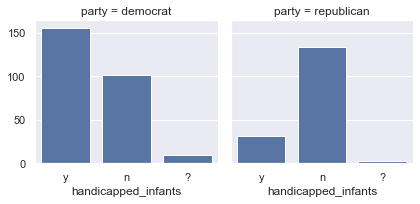

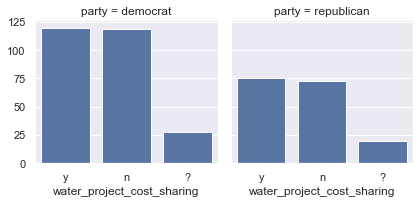

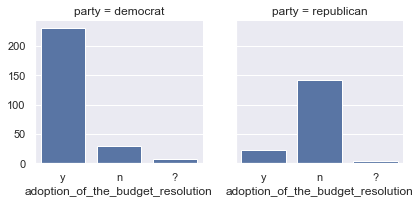

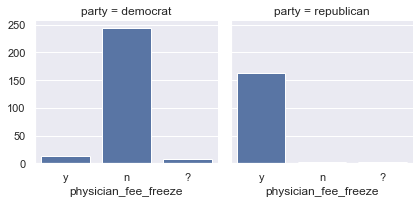

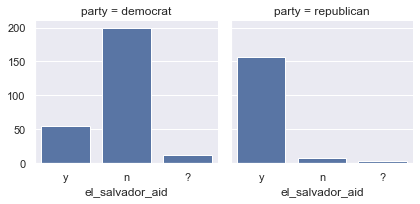

In [39]:
def plot_votes(vote):
    sns.set(rc={'figure.figsize':(8,4)})
    g = sns.FacetGrid(votes, col="party", margin_titles=True)
    g.map(sns.countplot, vote)

for vote in votes.columns[1:6]:
    plot_votes(vote)    

When examining these charts, keep in mind that there are more Democrats than Republican in the 1984 Congress. What is important is the probability of Yes vote or No vote for the members of each party.  These probabilities of votes by party are used to train the naive Bayes model. Some votes are quite skewed by party affiliation, such as 'adoption of the budget resolution'. These features are expected to be predictive. Whereas, some votes have similar probabilities by party, such as 'water project cost sharing', and are not expected to be predictive.

### A First Naive Bayes Model

Now that we understand a bit about the characteristics of the data, its time to train and test a naive Bayes model. The [scikit-learn sklearn.naive_bayes.MultinomialNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) is a naive Bayes model for **multinomial categorical features**. A multinomial feature has more than two possible categories. In this case there are three vote categories, counting the missed vote category, '?'.   

In order to build a machine model, we need to construct a **model matrix** or **design matrix**. To construct our model matrix we will use the [patsy package](https://patsy.readthedocs.io/en/latest/). In this case, we want to include all of the features, or votes. Execute the code in the cell below to construct the model formula. 

In [40]:
vote_formula = ''
for vote in votes.columns[1:-1]:
    vote_formula = vote_formula + vote + '+' 
vote_formula = vote_formula  + votes.columns[len(votes.columns)-1:][0]
vote_formula

'handicapped_infants+water_project_cost_sharing+adoption_of_the_budget_resolution+physician_fee_freeze+el_salvador_aid+religious_groups_in_schools+anti_satellite_test_ban+aid_to_nicaraguan_contras+mx_missile+immigration+synfuels_corporation_cutback+education_spending+superfund_right_to_sue+crime+duty_free_exports+export_administration_act_south_africa'

The code in the cell below constructs the model matrix using the formula just defined. The label is constructed by converting the label categories to $\{0,1\}$ binary values. Execute this code and examine the sample printed.

In [41]:
X_votes = dmatrix(vote_formula + ' - 1', data=votes)
y_votes = [0 if x=='republican' else 1 for x in votes.loc[:,'party']]
print(y_votes[:5])
print(X_votes[:5])

[0, 0, 1, 1, 1]
[[0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0.
  0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0.
  0. 0. 0. 0. 0. 1. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1.
  0. 0. 0. 0. 0. 1. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1.
  0. 0. 0. 1. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0.
  1. 0. 0. 0. 0. 0. 0. 0. 0.]]


With the label and model matrix constructed, it is time to train a naive Bayes model. The model is defined using [sklearn.naive_bayes.MultinomialNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html), and then fit or trained. Notice that the **Laplace smoothing parameter** is set to a small value. Execute this code. 

In [42]:
# Define the model
NB_model = sklearn.naive_bayes.MultinomialNB(alpha=1e-6)
# Train the model with the features and labels.
nr.seed(234)
NB_model.fit(X_votes,y_votes)

MultinomialNB(alpha=1e-06, class_prior=None, fit_prior=True)

With the model trained, let's evaluate its performance. We can get a quick overview of the model's effectiveness by printing the first 10 rows of the result. Execute the code in the cell below to print the first 10 rows of the result and examine the result.

In [43]:
def predict_results(model, X, df, label_column, class_labels):
    ## Compute the predicted classes and probabilities
    predicted = [class_labels[0] if x==1 else class_labels[1] for x in model.predict(X)]
    probabilities = model.predict_proba(X)

    ## Form a data frame from the results and return
    return pd.DataFrame({
            label_column: df.loc[:,label_column],
            'predicted': predicted,
            'proba(' + class_labels[1] + ')': probabilities[:,0],
            'proba(' + class_labels[0] + ')': probabilities[:,1],
            })

results = predict_results(NB_model, X_votes[:10], votes[:10], 'party', ['democrat','republican'])
results

,party,predicted,proba(republican),proba(democrat)
0,republican,republican,9.996342e-01,0.000366
1,republican,republican,9.993736e-01,0.000626
2,democrat,republican,9.763456e-01,0.023654
3,democrat,democrat,6.388195e-03,0.993612
4,democrat,democrat,1.825626e-01,0.817437
5,democrat,democrat,2.615208e-01,0.738479
6,democrat,republican,9.958253e-01,0.004175
7,republican,republican,9.962874e-01,0.003713
8,republican,republican,9.997168e-01,0.000283
9,democrat,democrat,3.821128e-08,1.000000


As you examine these results noticing:
1. There is 2 classification errors, with 8 cases correctly classified.
2. In most cases, the probability of the class predicted (score) is much larger than for the other class, including for the cases with classification errors.

As a next step, we can compute the confusion matrix and performance metrics for this model. The functions in the cell below use [sklearn.metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) to compute and print the performance metrics and the confusion matrix. Execute this code and examine the results.

In [44]:
def confusion_matrix(labels, predicted, label_classes):
    '''Function retrns a data frame containing the confusion matrix'''
    return pd.DataFrame(
        sklearn.metrics.confusion_matrix(labels, predicted),
        index=[label_classes], 
        columns=label_classes)    

def performance(results, label_column, categories_label):
    ## Convert column to categorical
    results.loc[:,'predicted'] = pd.Series(results.loc[:,'predicted'], dtype=categories_label)
    ## Compute metrics
    accuracy = sklearn.metrics.accuracy_score(
                  results[label_column].cat.codes, results['predicted'].cat.codes)
    precision = sklearn.metrics.precision_score(
                  results[label_column].cat.codes, results['predicted'].cat.codes)
    recall = sklearn.metrics.recall_score(
               results[label_column].cat.codes, results['predicted'].cat.codes)
    ## Print metrics
    print('Accuracy = %.3f, Precision = %.3f, Recall = %.3f' % (accuracy, precision, recall))
    ## Return confusion matrix
    return confusion_matrix(
        results.loc[:,label_column], 
        results.loc[:,'predicted'], 
        results.loc[:,label_column].cat.categories)

performance(results, 'party', categories_label)

Accuracy = 0.800, Precision = 0.667, Recall = 1.000


,democrat,republican
democrat,4,2
republican,0,4


The results are reasonably good, given we are looking at only the first 10 of 435 Congresspeople. 

Execute the code in the cell below computes and prints an evaluation of the model using all the cases and compare the results to the first model.

In [55]:
results_all = predict_results(NB_model, X_votes, votes,  'party', ['democrat','republican'])
results_all[:5]
performance(results_all, 'party', categories_label)

Accuracy = 0.906, Precision = 0.859, Recall = 0.905


,democrat,republican
democrat,242,25
republican,16,152


These are fairly good metrics. The model seems to work reasonably well. 

The **Laplace smoothing method** is an effective way to deal with data sets which do not have sufficient samples to compute probabilities. This method avoids the case where $p(x_j|C_k) = 0$. 

The code in the cell below computes a naive Bayes model using the same congressional vote data, but with a Laplace smoother with a span of 10 data points. Execute this code and examine the results. 

In [56]:
# The `alpha` parameter controls the Laplace smoothing
model_alpha3 = sklearn.naive_bayes.MultinomialNB(alpha=10)
nr.seed(2345)
model_alpha3.fit(X_votes, y_votes)
results_alpha3 = predict_results(NB_model, X_votes, votes, 'party', ['democrat','republican'])
performance(results_alpha3, 'party', categories_label)

Accuracy = 0.906, Precision = 0.859, Recall = 0.905


,democrat,republican
democrat,242,25
republican,16,152


These results are identical to those with lower Laplace smoothing parameters. 

## Another Naive Bayes Example

Let's try another binary classification example. The code in the cell below loads some sample US Census data. We want to build and evaluate a naive Bayes model to classify people by high and low income using $50,000 as the cut-off. The columns are also given Python friendly names. Execute this code and examine the features in the data set. 

In [47]:
income = pd.read_csv('Adult Census Income Binary Classification dataset.csv', sep=', ', engine='python') #, sep=', ', engine='python')

## Give the columns Python friently names
income.columns = [s.replace('-','_') for s in income.columns]

income.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


We can see some features which are likely to be colinear. There is also one feature, fnlwgt, which is not useful in classifying the people. Two other columns, capital_gain and capital_loss are quite sparse and reduce accuracy.  

The code in the cell below removes these columns. Execute this code to create a data set with reduced features

In [48]:
income = income.drop(['workclass', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'relationship'], axis=1)
income.columns

Index(['age', 'education', 'marital_status', 'occupation', 'race', 'sex',
       'hours_per_week', 'native_country', 'income'],
      dtype='object')

###  Build the Model Matrix  

Now we are ready to use the dmatrix function from the patsy package to create the model matrix. The code in the cell below creates a model formula, then a model matrix and label column. Execute this code and examine the results. 

In [49]:
income_formula = ''
for col in income.columns[:-2]:
    income_formula = income_formula + col + ' + ' 
income_formula = income_formula  + income.columns[-2]
print(income_formula)

X_income = dmatrix(income_formula + ' - 1', data=income)
y_income = [0 if x=='<=50K' else 1 for x in income.loc[:,'income']]
print(y_income[:5])
print(X_income[:2])

age + education + marital_status + occupation + race + sex + hours_per_week + native_country
[0, 0, 0, 0, 0]
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  1.  0.  0. 39. 40.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  1.
   0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  1.  0.  0. 50. 13.]]


***
**Your turn 1:** In the cell below complete and execute code to do the following: 

1. Define and compute a naive Multinomial model to classify income using the features in the Income data set model matrix. Use alpha = 0.01 for smoothing.  
2. Compute the results, using the income data frame, the 'income' column as the label and ['>50K','<=50K'] as the categories. Call your data frame results_income. 
3. Print the first 20 rows of results. Examine the predictions vs the actual categories and the conditional probabilities to get a feel how the classifier works. 
***

In [50]:
nr.seed(44234)
## Complete the missing lines of code below
model_income =  sklearn.naive_bayes.MultinomialNB(alpha=0.01).fit(X_income,y_income)

results_income = predict_results(model_income, X_income, income, 'income', ['>50K','<=50K'])
results_income[:20]

,income,predicted,proba(<=50K),proba(>50K)
0,<=50K,<=50K,0.951753,0.048247
1,<=50K,>50K,0.114611,0.885389
2,<=50K,<=50K,0.957381,0.042619
3,<=50K,<=50K,0.985038,0.014962
4,<=50K,>50K,0.422659,0.577341
5,<=50K,>50K,0.118877,0.881123
6,<=50K,<=50K,0.999556,0.000444
7,>50K,>50K,0.366752,0.633248
8,>50K,<=50K,0.759041,0.240959
9,>50K,>50K,0.154978,0.845022


Paying particular attention to the incorrectly classified cases, notice the probabilities for the two categories. Do incorrectly classified cases tend to have probabilities closer to $\{0.5,0.5\}$ than correctly classified cases?  

Finally, execute the code in the cell below to measure the performance of the model you have constructed. 

In [51]:
income_categories = pd.CategoricalDtype(['<=50K','>50K'])
results_income.loc[:,'income'] = pd.Series(results_income.loc[:,'income'], dtype=income_categories)
performance(results_income, 'income', income_categories)

Accuracy = 0.815, Precision = 0.631, Recall = 0.557


,<=50K,>50K
<=50K,22164,2556
>50K,3475,4366


The overall accuracy of the model seems good. But, notice that the classification of cases for the $\gt 50K$ class is quite poor. Barely one half of the $\gt 50K$ cases are correctly classified. This leads to low precision and recall values.   

This performance is likely a result of the **class imbalance** in the training data. There are approximate 25,000 cases of $\le 50K$ but only about 8,000 cases of $\gt 50K$. A useless classifier that said all cases were $\le 50K$ would be about 75% accurate! Always be aware of the effect of class imbalance when evaluating any machine learning model!    

***
**Your turn 2:** One way to improve a naive Bayes model is to assign prior probabilities to the classes. Recall that a Multinomial classifier 

$$\hat{y} = argmax_k \Big[ log \big( p(C_k) \big) +  \sum^N_{j = 1} log \big( p_{kj}(x_i) \big) \Big]$$   

Assigning prior probabilities to the class chances the value of $p(C_k)$ used to determine the most probable category. In other words, the prior probabilities introduce a bias into the model in order to obtain a better result.  

In the cell below complete and execute code to construct and evaluate a naive Bayes model with the class_prior argument to MultinomialNB set to [0.6,0.4]. These values overweight the underrepresented $\gt 50K$ category.  
***

In [52]:
nr.seed(23411)
## Complete the missing lines of code below
model_income = sklearn.naive_bayes.MultinomialNB(alpha=0.01, class_prior=[0.6,0.4]).fit(X_income,y_income)

results_income = predict_results(model_income, X_income, income, 'income', ['>50K','<=50K'])
results_income.loc[:,'income'] = pd.Series(results_income.loc[:,'income'], dtype=income_categories)
performance(results_income, 'income', income_categories)

Accuracy = 0.788, Precision = 0.545, Recall = 0.730


,<=50K,>50K
<=50K,19938,4782
>50K,2120,5721


Compare these results to those previously obtained, noticing the following: 
1. The accuracy and precision are reduced, but recall is increased significantly. 
2. Nearly 3 out of 4 $\gt 50K$ cases are now correctly classified. 
3. However, the number of correctly classified $\le 50K$ cases is reduced. 

Is this a better model? If you value correct classification of $\gt 50K$ cases over $\le 50K$ cases, then yes. Otherwise, no. 

## Naive Bayes Models with Limited Data

As was already mentioned, naive Bayes models can often produce surprisingly good performance when limited data is available. Here we will investigate two aspects of this property:    
1. Situations where there are only a limited number of features for which data is available. This can occur which collecting data on other variables in not possible or too expensive.   
2. Situations with limited observations or cases. This can occur when data collection is limited, often by time required or cost. 

### Changing Number of Features

Let's investigate the effect of adding more features to the naive Bayes model. In the case of the Congressional vote data, each vote is a feature. We can add features one at a time and examine the change in model performance.    

The code in the cell below computes and evaluates naive Bayes models using 2 to 8 votes, out of 16 total. Execute this code and compare the results to those obtained using the full data set.

In [57]:
nr.seed(23467)
for num_features in range(2,9):
    print('\nPerformance of model with {} features.'.format(num_features))
    model_features = sklearn.naive_bayes.MultinomialNB(alpha=0.001)
    model_features.fit(X_votes[:,:num_features], y_votes)
    results_features = predict_results(model_features, X_votes[:,:num_features], votes, 'party', ['democrat','republican'])
    print(performance(results_features, 'party', categories_label))
    


Performance of model with 2 features.
Accuracy = 0.687, Precision = 0.568, Recall = 0.798
            democrat  republican
democrat         165         102
republican        34         134

Performance of model with 3 features.
Accuracy = 0.687, Precision = 0.568, Recall = 0.798
            democrat  republican
democrat         165         102
republican        34         134

Performance of model with 4 features.
Accuracy = 0.687, Precision = 0.568, Recall = 0.798
            democrat  republican
democrat         165         102
republican        34         134

Performance of model with 5 features.
Accuracy = 0.687, Precision = 0.568, Recall = 0.798
            democrat  republican
democrat         165         102
republican        34         134

Performance of model with 6 features.
Accuracy = 0.853, Precision = 0.882, Recall = 0.714
            democrat  republican
democrat         251          16
republican        48         120

Performance of model with 7 features.
Accuracy = 

You can see from these results, that the model gains accuracy rapidly as the number of features increases. In fact, by the time 8 features are used, the results are close to those obtained with all 16 features. 



### Increasing Number of Training Cases 

***
**Your turn 3.** In the cell below complete and execute code to compute and  print the performance statistics for 25, 50, 100, 500, 1000, 2000, 8000, and 32561 cases (rows) of the Income data set. Use the same class priors as before. 
***

In [54]:
nr.seed(55234)
for num_cases in [25,50,500,2000,8000,32561]:
    print('\nPerformance of model with {} training cases.'.format(num_cases))
    ## Complete the missing lines of code below
    model_cases = sklearn.naive_bayes.MultinomialNB(alpha=0.01).fit(X_income[:num_cases,:], y_income[:num_cases])
    
    results_income = predict_results(model_income, X_income[:num_cases,:], income.iloc[:num_cases], 'income', ['>50K','<=50K'])
    results_income.loc[:,'income'] = pd.Series(results_income.loc[:,'income'], dtype=income_categories)
    print(performance(results_income, 'income', income_categories))


Performance of model with 25 training cases.
Accuracy = 0.840, Precision = 0.700, Recall = 0.875
       <=50K  >50K
<=50K     14     3
>50K       1     7

Performance of model with 50 training cases.
Accuracy = 0.760, Precision = 0.500, Recall = 0.917
       <=50K  >50K
<=50K     27    11
>50K       1    11

Performance of model with 500 training cases.
Accuracy = 0.788, Precision = 0.523, Recall = 0.717
       <=50K  >50K
<=50K    313    74
>50K      32    81

Performance of model with 2000 training cases.
Accuracy = 0.782, Precision = 0.548, Recall = 0.727
       <=50K  >50K
<=50K   1201   300
>50K     136   363

Performance of model with 8000 training cases.
Accuracy = 0.785, Precision = 0.537, Recall = 0.733
       <=50K  >50K
<=50K   4882  1206
>50K     511  1401

Performance of model with 32561 training cases.
Accuracy = 0.788, Precision = 0.545, Recall = 0.730
       <=50K  >50K
<=50K  19938  4782
>50K    2120  5721


How many training cases are required until the performance is close to the model using all training cases? 

## Summary

In this notebook we have explored the following:

1. Theory of naive Bayes models.
2. Pitfalls of naive Bayes. 
3. Good regularization properties. 
4. Computationally efficient. 
5. Examples of computing and evaluating naive Bayes models.
6. Examine the effects of data set size on the results of naive Bayes models. 

#### Copyright 2017, 2018, 2019, 2020, Stephen F Elston. All rights reserved. 